In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-10-04 11:18:28.836503: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open three different DataFrames, one for an extended parameter list, one with mean values over 3x3 pixels, and one with 3x3 gradients. 

# Then merge the two dataframes and use predictors from both.

# Open dict with collocated ASCAT data with extended parameters

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_extended.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df_extended = pd.concat(d.values(), ignore_index=True)
df_extended

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,f_low_res,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,0.0,0.0,0.0,0.0,0.039,0.053,0.047,0.0,0.238532,-5.737517
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,0.0,0.0,0.0,0.0,0.039,0.053,0.047,0.0,-1.083250,-4.539131
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.0,-2.766900,1.243604
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.0,-2.842668,3.493784
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.309100,6.034675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,2.753492,10.223569
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,5.230340,7.564519
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,4.118421,7.908356
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,1.0,11.407662,5.259252


In [6]:
df_extended = df_extended.dropna(subset=['UWr', 'rhoair'])
df_extended

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,f_low_res,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,0.0,0.0,0.0,0.0,0.039,0.053,0.047,0.0,0.238532,-5.737517
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,0.0,0.0,0.0,0.0,0.039,0.053,0.047,0.0,-1.083250,-4.539131
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.0,-2.766900,1.243604
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.0,-2.842668,3.493784
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.309100,6.034675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,2.753492,10.223569
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,5.230340,7.564519
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,4.118421,7.908356
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,1.0,11.407662,5.259252


In [7]:
df_extended = df_extended.sample(frac = 1, random_state=77)
df_extended     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,f_low_res,u10,v10
9626,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.169079,-4.058057
4101,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.003606,-9.879706
8683,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-4.061016,-5.040464
6116,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.066437,10.131066
4981,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.625531,-2.935804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.581178,0.289933
7832,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.516811,-11.416153
9509,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316401,-4.644203
2283,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.923544,-8.592131


In [8]:
wind_speed_ifs = np.sqrt( (df_extended['u10'].values)**2 + (df_extended['v10'].values)**2)

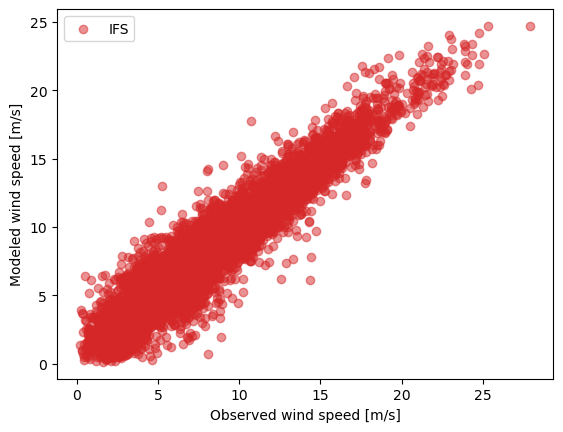

In [9]:
plt.scatter(df_extended['U10e'].values, wind_speed_ifs, label='IFS', color='C3', alpha=0.5)
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

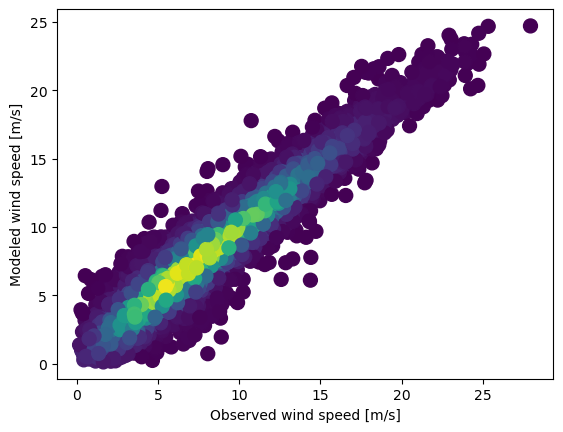

In [11]:
from scipy.stats import gaussian_kde

# Generate fake data
x = df_extended['U10e'].values
y = wind_speed_ifs

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.show()

# Open dict with collocated ASCAT data with mean values over 3x3 grid

In [8]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [9]:
with open(data_dir + 'collocated_dict_ascat_mean_3x3_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [10]:
df_mean3x3 = pd.concat(d.values(), ignore_index=True)
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.230000,101.641106,146.938889,36.868889,27.528889,36.837780,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.353333,-57.936665,-102.671112,59.132221,48.085556,59.247776,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10211,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10212,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10213,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.220001,-99.427780,-53.618889,51.765553,40.707779,51.669998,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [11]:
df_mean3x3 = df_mean3x3.dropna(subset=['UWr', 'rhoair'])
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.230000,101.641106,146.938889,36.868889,27.528889,36.837780,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.353333,-57.936665,-102.671112,59.132221,48.085556,59.247776,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10211,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10212,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10213,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.220001,-99.427780,-53.618889,51.765553,40.707779,51.669998,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [12]:
df_mean3x3 = df_mean3x3.sample(frac = 1, random_state=77)
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
3175,0.009946,-0.040725,251.644999,2488.538111,1010.165888,1011.414993,2.023150,2.102516,44.113950,42.683681,...,53.956665,99.791107,145.563339,52.277775,41.104446,52.305553,20161028T122100Z,20161028T135958.125000Z,15.144855,-2.822690
5169,-0.027121,0.194371,239.635000,2487.032256,998.520588,999.752997,3.178341,3.271420,66.910311,65.581157,...,70.139999,114.791107,159.307770,49.006664,38.250000,48.833328,20160914T132400Z,20160914T150558.125000Z,8.358912,5.857295
911,-0.002550,0.047334,365.990002,2470.313919,1016.734566,1017.941489,9.171636,9.150481,97.994251,98.260211,...,-144.827774,-98.895554,-52.968887,56.699997,45.240002,56.580002,20160901T042700Z,20160901T060858.125000Z,1.758566,-1.261437
2467,-0.112423,-0.138597,318.864999,2484.770831,1004.801770,1006.039008,3.824792,3.934362,79.711996,78.629340,...,-145.418884,-99.666664,-53.930000,53.176666,41.901112,53.065552,20180321T005100Z,20180321T023258.125000Z,4.061894,-9.476074
1305,0.090287,0.021701,334.275000,2472.734501,1018.892789,1020.097504,8.773203,8.746292,87.496500,87.088105,...,-146.167496,-100.784996,-55.379997,44.070000,33.764999,43.982498,20170113T003600Z,20170113T021758.125000Z,1.902182,-2.111862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,255.695001,2491.591320,1016.959958,1018.225497,2.193931,2.288993,54.886954,53.067623,...,-19.026665,-63.754440,-108.813324,40.072220,30.377777,40.324448,20210123T133900Z,20210123T152058.125000Z,7.729342,1.375466
9509,0.067179,-0.072297,334.020003,2476.432567,1003.534996,1004.743500,6.920789,6.950604,91.900203,91.827979,...,53.567776,99.418884,145.202209,52.582222,41.386665,52.604443,20190819T115100Z,20190819T130258.125000Z,8.472304,4.346781
2283,-0.001104,0.040936,266.884998,2482.950819,1010.863999,1012.084000,4.619135,4.734795,66.192197,64.257764,...,55.698887,101.027779,146.303329,41.101112,31.166664,41.110001,20180120T140600Z,20180120T154758.125000Z,0.534965,2.769807
10196,0.078067,-0.018678,245.715002,2491.537245,1003.469848,1004.726501,2.997655,3.071019,83.056952,82.119077,...,-147.272507,-101.732498,-56.191250,44.463745,34.074997,44.376247,20200117T213000Z,20200117T231158.125000Z,14.079101,1.822556


### Rename columns so that we can recognize them after merging

In [13]:
df_mean3x3 = df_mean3x3.rename(
    columns={
        'sigma0_trip_fore': 'sigma0_trip_fore_mean3x3', 
        'sigma0_trip_mid': 'sigma0_trip_mid_mean3x3',
        'sigma0_trip_aft': 'sigma0_trip_aft_mean3x3',
        'azi_angle_trip_fore': 'azi_angle_trip_fore_mean3x3',
        'azi_angle_trip_mid': 'azi_angle_trip_mid_mean3x3', 
        'azi_angle_trip_aft': 'azi_angle_trip_aft_mean3x3',
        'inc_angle_trip_fore': 'inc_angle_trip_fore_mean3x3', 
        'inc_angle_trip_mid': 'inc_angle_trip_mid_mean3x3', 
        'inc_angle_trip_aft': 'inc_angle_trip_aft_mean3x3',
        'start_sensing_time': 'start_sensing_time_mean3x3',
        'stop_sensing_time': 'stop_sensing_time_mean3x3'
    }
)

In [14]:
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore_mean3x3,azi_angle_trip_mid_mean3x3,azi_angle_trip_aft_mean3x3,inc_angle_trip_fore_mean3x3,inc_angle_trip_mid_mean3x3,inc_angle_trip_aft_mean3x3,start_sensing_time_mean3x3,stop_sensing_time_mean3x3,u10,v10
3175,0.009946,-0.040725,251.644999,2488.538111,1010.165888,1011.414993,2.023150,2.102516,44.113950,42.683681,...,53.956665,99.791107,145.563339,52.277775,41.104446,52.305553,20161028T122100Z,20161028T135958.125000Z,15.144855,-2.822690
5169,-0.027121,0.194371,239.635000,2487.032256,998.520588,999.752997,3.178341,3.271420,66.910311,65.581157,...,70.139999,114.791107,159.307770,49.006664,38.250000,48.833328,20160914T132400Z,20160914T150558.125000Z,8.358912,5.857295
911,-0.002550,0.047334,365.990002,2470.313919,1016.734566,1017.941489,9.171636,9.150481,97.994251,98.260211,...,-144.827774,-98.895554,-52.968887,56.699997,45.240002,56.580002,20160901T042700Z,20160901T060858.125000Z,1.758566,-1.261437
2467,-0.112423,-0.138597,318.864999,2484.770831,1004.801770,1006.039008,3.824792,3.934362,79.711996,78.629340,...,-145.418884,-99.666664,-53.930000,53.176666,41.901112,53.065552,20180321T005100Z,20180321T023258.125000Z,4.061894,-9.476074
1305,0.090287,0.021701,334.275000,2472.734501,1018.892789,1020.097504,8.773203,8.746292,87.496500,87.088105,...,-146.167496,-100.784996,-55.379997,44.070000,33.764999,43.982498,20170113T003600Z,20170113T021758.125000Z,1.902182,-2.111862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,255.695001,2491.591320,1016.959958,1018.225497,2.193931,2.288993,54.886954,53.067623,...,-19.026665,-63.754440,-108.813324,40.072220,30.377777,40.324448,20210123T133900Z,20210123T152058.125000Z,7.729342,1.375466
9509,0.067179,-0.072297,334.020003,2476.432567,1003.534996,1004.743500,6.920789,6.950604,91.900203,91.827979,...,53.567776,99.418884,145.202209,52.582222,41.386665,52.604443,20190819T115100Z,20190819T130258.125000Z,8.472304,4.346781
2283,-0.001104,0.040936,266.884998,2482.950819,1010.863999,1012.084000,4.619135,4.734795,66.192197,64.257764,...,55.698887,101.027779,146.303329,41.101112,31.166664,41.110001,20180120T140600Z,20180120T154758.125000Z,0.534965,2.769807
10196,0.078067,-0.018678,245.715002,2491.537245,1003.469848,1004.726501,2.997655,3.071019,83.056952,82.119077,...,-147.272507,-101.732498,-56.191250,44.463745,34.074997,44.376247,20200117T213000Z,20200117T231158.125000Z,14.079101,1.822556


In [15]:
df_extended['start_sensing_time']

9626    20191018T122400Z
4101    20151216T131800Z
8683    20210703T221800Z
6116    20170906T005100Z
4981    20160825T133900Z
              ...       
9119    20181127T232700Z
7832    20210223T120600Z
9509    20190926T202700Z
2283    20180208T151200Z
8799    20210724T123300Z
Name: start_sensing_time, Length: 9998, dtype: object

In [16]:
df_extended['lat']

9626    59.9337
4101   -54.4041
8683    59.9337
6116    40.1334
4981   -54.4041
         ...   
9119    40.1334
7832    59.9337
9509    59.9337
2283    40.1334
8799    59.9337
Name: lat, Length: 9998, dtype: float64

# Open dict with collocated ASCAT data with mean values over 7x7 grid

In [17]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [18]:
with open(data_dir + 'collocated_dict_ascat_mean_7x7_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [19]:
df_mean7x7 = pd.concat(d.values(), ignore_index=True)
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,55.998528,101.448814,146.780594,38.544704,28.932056,38.514412,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.371224,-57.958775,-102.696526,58.903469,47.875103,59.018360,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10239,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10240,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10241,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.206573,-99.382286,-53.537422,51.728283,40.844284,51.631428,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [20]:
df_mean7x7 = df_mean7x7.dropna(subset=['UWr', 'rhoair'])
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,55.998528,101.448814,146.780594,38.544704,28.932056,38.514412,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.371224,-57.958775,-102.696526,58.903469,47.875103,59.018360,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10239,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10240,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10241,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.206573,-99.382286,-53.537422,51.728283,40.844284,51.631428,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [21]:
df_mean7x7 = df_mean7x7.sample(frac = 1, random_state=77)
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
1021,0.001782,0.000093,371.484998,2458.009279,1011.868144,1013.037003,13.392523,13.305839,90.438449,89.768469,...,115.157921,70.284996,25.544584,50.996250,40.385418,50.870419,20161017T234800Z,20161018T012958.125000Z,1.562817,-0.072222
8319,-0.012150,-0.032903,235.910527,2490.682423,1024.758077,1026.018433,3.618056,3.690585,72.003161,70.689212,...,103.337753,58.686115,13.992856,57.315510,46.251427,57.263264,20210407T192100Z,20210407T210258.125000Z,5.125797,-3.413611
5481,0.050743,0.185299,340.294737,2484.218275,994.332208,995.538953,4.828401,4.883872,73.159460,72.295820,...,72.563271,117.101845,161.548981,56.841225,45.763264,56.661633,20161208T131200Z,20161208T145358.125000Z,8.275084,6.100164
24,-0.228433,0.119486,318.164999,2475.939764,1007.714327,1008.913007,7.096543,7.200788,77.793648,74.634261,...,112.693260,67.873466,23.055511,59.282860,48.124691,59.207134,20180410T030000Z,20180410T044458.125000Z,2.763711,1.752537
3060,0.009946,-0.040725,320.855002,2482.849903,997.338129,998.550006,5.862060,5.884601,90.702000,90.576984,...,-16.857756,-61.516117,-106.146538,48.343266,37.708164,48.360004,20161007T135100Z,20161007T152958.125000Z,-0.966533,3.281086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,301.965001,2491.126289,1015.883896,1017.144498,3.200247,3.267256,74.825154,73.883102,...,-18.339592,-63.027138,-107.893265,44.879791,34.569183,44.961220,20210120T123300Z,20210120T141458.125000Z,-10.460773,-6.665235
9509,-0.117259,-0.124501,358.460001,2475.763973,1010.089960,1011.300494,7.740276,7.737790,94.784452,94.860108,...,102.092850,57.455505,12.912857,58.240410,47.163261,58.127552,20190812T203300Z,20190812T221458.125000Z,2.308954,-3.119556
2283,-0.175301,0.137656,245.100003,2483.387743,1013.904479,1015.144501,3.383261,3.524088,62.881447,60.933615,...,-145.291595,-99.640388,-53.939598,51.941601,41.123199,51.851196,20180120T003300Z,20180120T021758.125000Z,0.494966,1.721997
10196,0.078067,-0.018678,278.325000,2491.370881,979.607813,980.827499,3.435529,3.496055,82.756252,82.163943,...,-13.453673,-58.034081,-102.635712,58.308567,47.280609,58.358368,20200113T140600Z,20200113T154458.125000Z,-3.682891,16.288317


### Rename columns so that we can recognize them after merging

In [22]:
df_mean7x7 = df_mean7x7.rename(
    columns={
        'sigma0_trip_fore': 'sigma0_trip_fore_mean7x7', 
        'sigma0_trip_mid': 'sigma0_trip_mid_mean7x7',
        'sigma0_trip_aft': 'sigma0_trip_aft_mean7x7',
        'azi_angle_trip_fore': 'azi_angle_trip_fore_mean7x7',
        'azi_angle_trip_mid': 'azi_angle_trip_mid_mean7x7', 
        'azi_angle_trip_aft': 'azi_angle_trip_aft_mean7x7',
        'inc_angle_trip_fore': 'inc_angle_trip_fore_mean7x7', 
        'inc_angle_trip_mid': 'inc_angle_trip_mid_mean7x7', 
        'inc_angle_trip_aft': 'inc_angle_trip_aft_mean7x7',
        'start_sensing_time': 'start_sensing_time_mean7x7',
        'stop_sensing_time': 'stop_sensing_time_mean7x7'
    }
)

In [23]:
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore_mean7x7,azi_angle_trip_mid_mean7x7,azi_angle_trip_aft_mean7x7,inc_angle_trip_fore_mean7x7,inc_angle_trip_mid_mean7x7,inc_angle_trip_aft_mean7x7,start_sensing_time_mean7x7,stop_sensing_time_mean7x7,u10,v10
1021,0.001782,0.000093,371.484998,2458.009279,1011.868144,1013.037003,13.392523,13.305839,90.438449,89.768469,...,115.157921,70.284996,25.544584,50.996250,40.385418,50.870419,20161017T234800Z,20161018T012958.125000Z,1.562817,-0.072222
8319,-0.012150,-0.032903,235.910527,2490.682423,1024.758077,1026.018433,3.618056,3.690585,72.003161,70.689212,...,103.337753,58.686115,13.992856,57.315510,46.251427,57.263264,20210407T192100Z,20210407T210258.125000Z,5.125797,-3.413611
5481,0.050743,0.185299,340.294737,2484.218275,994.332208,995.538953,4.828401,4.883872,73.159460,72.295820,...,72.563271,117.101845,161.548981,56.841225,45.763264,56.661633,20161208T131200Z,20161208T145358.125000Z,8.275084,6.100164
24,-0.228433,0.119486,318.164999,2475.939764,1007.714327,1008.913007,7.096543,7.200788,77.793648,74.634261,...,112.693260,67.873466,23.055511,59.282860,48.124691,59.207134,20180410T030000Z,20180410T044458.125000Z,2.763711,1.752537
3060,0.009946,-0.040725,320.855002,2482.849903,997.338129,998.550006,5.862060,5.884601,90.702000,90.576984,...,-16.857756,-61.516117,-106.146538,48.343266,37.708164,48.360004,20161007T135100Z,20161007T152958.125000Z,-0.966533,3.281086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,301.965001,2491.126289,1015.883896,1017.144498,3.200247,3.267256,74.825154,73.883102,...,-18.339592,-63.027138,-107.893265,44.879791,34.569183,44.961220,20210120T123300Z,20210120T141458.125000Z,-10.460773,-6.665235
9509,-0.117259,-0.124501,358.460001,2475.763973,1010.089960,1011.300494,7.740276,7.737790,94.784452,94.860108,...,102.092850,57.455505,12.912857,58.240410,47.163261,58.127552,20190812T203300Z,20190812T221458.125000Z,2.308954,-3.119556
2283,-0.175301,0.137656,245.100003,2483.387743,1013.904479,1015.144501,3.383261,3.524088,62.881447,60.933615,...,-145.291595,-99.640388,-53.939598,51.941601,41.123199,51.851196,20180120T003300Z,20180120T021758.125000Z,0.494966,1.721997
10196,0.078067,-0.018678,278.325000,2491.370881,979.607813,980.827499,3.435529,3.496055,82.756252,82.163943,...,-13.453673,-58.034081,-102.635712,58.308567,47.280609,58.358368,20200113T140600Z,20200113T154458.125000Z,-3.682891,16.288317


# DataFrame with gradients 7x7

In [24]:
with open(data_dir + 'collocated_dict_ascat_gradient_7x7_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [25]:
df_grad7x7 = pd.concat(d.values(), ignore_index=True)
df_grad7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,-0.181195,-0.211426,333.339998,2477.183924,1013.350947,1014.568500,6.500048,6.570197,85.631549,84.863134,...,113.699997,68.889999,24.059999,54.570000,43.459999,54.509998,20180405T030600Z,20180405T044758.125000Z,4.360941,1.169768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.078067,-0.018678,310.069994,2491.647426,997.185190,998.412506,4.373226,4.400169,85.412753,84.989054,...,54.549999,100.279999,145.940002,49.439999,38.480000,49.480000,20200121T114500Z,20200121T132358.125000Z,9.761609,-1.152873
6789,0.078067,-0.018678,299.200002,2491.674058,996.891473,998.120007,4.291631,4.320973,85.900303,85.518713,...,52.619999,98.610001,144.559998,55.549999,44.049999,55.289997,20200121T121500Z,20200121T135658.125000Z,9.660257,-1.935741
6790,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
6791,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894


In [26]:
df_grad7x7 = df_grad7x7.dropna(subset=['UWr', 'rhoair'])
df_grad7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,-0.181195,-0.211426,333.339998,2477.183924,1013.350947,1014.568500,6.500048,6.570197,85.631549,84.863134,...,113.699997,68.889999,24.059999,54.570000,43.459999,54.509998,20180405T030600Z,20180405T044758.125000Z,4.360941,1.169768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.078067,-0.018678,310.069994,2491.647426,997.185190,998.412506,4.373226,4.400169,85.412753,84.989054,...,54.549999,100.279999,145.940002,49.439999,38.480000,49.480000,20200121T114500Z,20200121T132358.125000Z,9.761609,-1.152873
6789,0.078067,-0.018678,299.200002,2491.674058,996.891473,998.120007,4.291631,4.320973,85.900303,85.518713,...,52.619999,98.610001,144.559998,55.549999,44.049999,55.289997,20200121T121500Z,20200121T135658.125000Z,9.660257,-1.935741
6790,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
6791,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894


In [27]:
df_grad7x7 = df_grad7x7.sample(frac = 1, random_state=77)
df_grad7x7     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
4534,-0.032881,-0.066335,354.930002,2477.523802,1010.124221,1011.345984,6.432838,6.461757,92.931653,92.958873,...,104.970001,60.309998,15.460000,51.279999,40.430000,51.439999,20200820T204800Z,20200820T222958.125000Z,-2.642549,7.299494
5884,-0.012150,-0.032903,348.509998,2482.583433,1021.666886,1022.909000,6.068217,6.072566,97.047853,97.260236,...,-13.809999,-58.389999,-102.989998,56.809998,45.770000,56.840000,20210623T140300Z,20210623T154158.125000Z,5.202958,2.503247
3130,-0.096742,-0.256058,339.840001,2483.598756,1025.167843,1026.423999,4.543451,4.578594,84.707887,84.525992,...,-162.129990,-117.559998,-73.000000,57.899998,46.879997,58.020000,20160429T041200Z,20160429T055358.125000Z,10.657385,1.380908
6536,0.078067,-0.018678,294.884998,2485.349514,1021.140943,1022.386508,5.228528,5.256178,88.630352,88.358336,...,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,20191018T122400Z,20191018T140558.125000Z,-4.786852,1.289569
929,0.107764,-0.173369,289.199998,2473.510835,1024.593900,1025.824005,6.092995,6.199298,80.796299,79.978310,...,55.049999,100.529999,145.929993,46.349998,35.719997,46.360001,20170113T140900Z,20170113T154758.125000Z,1.247879,-4.239812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.186782,0.418307,344.035001,2475.432878,1003.980576,1005.183505,7.748592,7.755491,96.237098,96.393674,...,51.689999,97.939995,144.000000,61.419998,49.980000,61.459999,20181128T172700Z,20181128T190558.125000Z,-2.082352,1.240975
2283,0.009946,-0.040725,322.300003,2489.425464,1009.137351,1010.379510,4.343677,4.379457,86.171650,85.833879,...,49.629997,96.139999,142.479996,62.910000,51.419998,62.949997,20170601T120600Z,20170601T134458.125000Z,-4.695946,7.894032
2004,0.009946,-0.040725,280.895001,2487.212276,1022.817826,1024.076505,4.476766,4.494666,89.290650,89.316839,...,53.320000,99.239998,145.089996,54.149998,42.879997,54.189999,20161102T121800Z,20161102T135658.125000Z,3.060370,-6.322997
3668,0.027770,0.144815,343.004994,2486.506486,1003.208213,1004.435010,5.574504,5.574473,98.219436,98.477885,...,-161.319992,-116.739998,-72.180000,56.239998,45.250000,56.340000,20161025T040900Z,20161025T055358.125000Z,6.032160,-8.511133


In [28]:
df_grad7x7 = df_grad7x7.rename(
    columns={
        'sigma0_trip_fore_x': 'sigma0_trip_fore_grad_x7x7', 
        'sigma0_trip_mid_x': 'sigma0_trip_mid_grad_x7x7',
        'sigma0_trip_aft_x': 'sigma0_trip_aft_grad_x7x7',
        'sigma0_trip_fore_y': 'sigma0_trip_fore_grad_y7x7', 
        'sigma0_trip_mid_y': 'sigma0_trip_mid_grad_y7x7',
        'sigma0_trip_aft_y': 'sigma0_trip_aft_grad_y7x7'
    }
)

# DataFrame with gradients 3x3

In [29]:
with open(data_dir + 'collocated_dict_ascat_gradient_3x3_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [30]:
df_grad3x3 = pd.concat(d.values(), ignore_index=True)
df_grad3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9165,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9166,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9167,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [31]:
df_grad3x3 = df_grad3x3.dropna(subset=['UWr', 'rhoair'])
df_grad3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9165,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9166,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9167,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [32]:
df_grad3x3 = df_grad3x3.sample(frac = 1, random_state=77)
df_grad3x3     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
1503,-0.042230,-0.334789,369.599998,2477.906722,1000.300826,1001.498499,7.974965,7.921645,97.577349,97.796572,...,54.889999,100.500000,145.979996,46.410000,35.730000,46.410000,20170526T140900Z,20170526T155058.125000Z,-2.172911,2.352134
4087,0.038686,0.082603,348.859995,2482.019101,992.072293,993.273495,6.127340,6.146534,89.098558,88.902068,...,-162.050003,-117.579994,-73.059998,58.379997,47.419998,58.520000,20160314T041200Z,20160314T055358.125000Z,16.120512,0.982410
8890,0.078067,-0.018678,322.135001,2486.252920,992.402913,993.617993,4.841986,4.883098,85.735253,85.364232,...,-11.090000,-55.649998,-100.449997,63.250000,52.360001,63.570000,20191109T141500Z,20191109T155658.125000Z,-5.969720,-6.151449
6597,-0.012150,-0.032903,310.074997,2488.131506,977.608494,978.824002,3.753534,3.801537,87.686853,87.442990,...,-17.129999,-61.789997,-106.739998,46.980000,36.489998,47.259998,20201111T135100Z,20201111T152958.125000Z,-2.866442,14.121944
1565,0.111582,-0.016399,376.785001,2470.839518,1007.676844,1008.868503,9.054920,9.040190,89.332898,88.474956,...,116.540001,71.669998,26.650000,37.730000,28.279999,37.700001,20180930T031800Z,20180930T045958.125000Z,1.973004,0.335455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,0.108413,0.517571,330.450005,2486.419860,1007.737764,1008.967007,5.635789,5.639626,95.155485,95.193701,...,70.150002,114.680000,159.139999,48.669998,37.969997,48.500000,20161025T132400Z,20161025T150258.125000Z,13.576246,5.677454
9119,0.078067,-0.018678,269.295003,2491.675542,980.709209,981.951001,2.038906,2.166475,70.647104,69.665131,...,-18.180000,-62.869999,-107.879997,42.959999,32.880001,43.209999,20200112T134500Z,20200112T152358.125000Z,13.502748,5.582858
7832,-0.012150,-0.032903,343.024994,2487.964085,993.379376,994.591995,5.564891,5.561886,92.930303,92.888906,...,-15.780000,-60.399998,-105.009995,52.590000,41.669998,52.619999,20210609T135100Z,20210609T153258.125000Z,0.451083,7.852533
2283,0.066199,-0.093856,347.385001,2477.379817,1020.312158,1021.544498,6.128193,6.172027,86.986450,86.726191,...,57.360001,102.909996,148.360001,39.709999,29.869999,39.680000,20160730T123600Z,20160730T141458.125000Z,6.541875,1.584597


In [33]:
df_grad3x3 = df_grad3x3.rename(
    columns={
        'sigma0_trip_fore_x': 'sigma0_trip_fore_grad_x3x3', 
        'sigma0_trip_mid_x': 'sigma0_trip_mid_grad_x3x3',
        'sigma0_trip_aft_x': 'sigma0_trip_aft_grad_x3x3',
        'sigma0_trip_fore_y': 'sigma0_trip_fore_grad_y3x3', 
        'sigma0_trip_mid_y': 'sigma0_trip_mid_grad_y3x3',
        'sigma0_trip_aft_y': 'sigma0_trip_aft_grad_y3x3'
    }
)

# DataFrame with IFS stress


In [34]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_without_spurs1_stress_params.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [35]:
df_ifs_stress = pd.concat(d.values(), ignore_index=True)
df_ifs_stress

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stop_sensing_time,u10,v10,chnk,msl,t2m,d2m,zust,rho_air,stress_ifs
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,20180403T044758.125000Z,-4.214585,3.935597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,20180403T044758.125000Z,-3.485326,3.685807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,20180404T060858.125000Z,0.053796,2.618398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,20180404T060858.125000Z,1.969399,1.141287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,20180404T193258.125000Z,4.476319,0.497334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,20200121T150558.125000Z,9.854824,-1.954211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,20200121T214758.125000Z,7.869203,-2.273894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,20200121T214758.125000Z,7.593998,-2.340672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,20200121T232958.125000Z,7.223359,-1.862569,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_ifs_stress = df_ifs_stress.dropna(subset=['UWr', 'rhoair'])
df_ifs_stress

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stop_sensing_time,u10,v10,chnk,msl,t2m,d2m,zust,rho_air,stress_ifs
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,20180403T044758.125000Z,-4.214585,3.935597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,20180403T044758.125000Z,-3.485326,3.685807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,20180404T060858.125000Z,0.053796,2.618398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,20180404T060858.125000Z,1.969399,1.141287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,20180404T193258.125000Z,4.476319,0.497334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,20200121T150558.125000Z,9.854824,-1.954211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,20200121T214758.125000Z,7.869203,-2.273894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,20200121T214758.125000Z,7.593998,-2.340672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,20200121T232958.125000Z,7.223359,-1.862569,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_ifs_stress = df_ifs_stress.sample(frac = 1, random_state=77)
df_ifs_stress  

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,stop_sensing_time,u10,v10,chnk,msl,t2m,d2m,zust,rho_air,stress_ifs
9626,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,20191018T140558.125000Z,-5.958139,-1.545760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4101,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,20151216T145958.125000Z,8.971909,-4.344576,0.012652,97845.703125,273.646210,271.958893,0.359769,1.246271,0.161309
8683,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,20210703T235958.125000Z,-4.204488,3.573421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,20170906T023258.125000Z,1.136973,0.297775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4981,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,20160825T151758.125000Z,3.032828,-0.430503,0.007266,100916.710938,266.942383,263.937531,0.123376,1.317680,0.020057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,20181128T011158.125000Z,1.278823,-1.836160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7832,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,20210223T134458.125000Z,-4.810270,17.208559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9509,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,20190926T220858.125000Z,-8.257064,9.131248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2283,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,20180208T165058.125000Z,1.450890,-3.203395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge

In [38]:
merged_df = pd.merge(df_extended, df_mean3x3)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid_mean3x3,sigma0_trip_aft_mean3x3,azi_angle_trip_fore_mean3x3,azi_angle_trip_mid_mean3x3,azi_angle_trip_aft_mean3x3,inc_angle_trip_fore_mean3x3,inc_angle_trip_mid_mean3x3,inc_angle_trip_aft_mean3x3,start_sensing_time_mean3x3,stop_sensing_time_mean3x3
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,-19.921255,-23.608553,54.789997,100.627777,146.345551,49.264442,38.259998,49.257774,20191018T122400Z,20191018T140558.125000Z
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,-17.551456,-16.258373,71.329994,115.860001,160.311096,53.189999,42.216667,53.020000,20151216T131800Z,20151216T145958.125000Z
2,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,-15.288120,-21.794518,-146.845566,-101.122223,-55.456665,46.481110,35.822220,46.347775,20210703T221800Z,20210703T235958.125000Z
3,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,-20.313808,-21.890211,-144.764282,-98.944283,-53.061428,57.432854,46.107143,57.335716,20170906T005100Z,20170906T023258.125000Z
4,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,-8.957937,-16.119785,67.684448,112.367775,156.937775,37.176662,27.869999,37.009998,20160825T133900Z,20160825T151758.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,-10.590591,-15.163862,115.646660,70.779999,25.855555,50.425552,39.767776,50.381107,20181127T232700Z,20181128T011158.125000Z
9994,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,-18.377037,-16.504398,49.649998,96.159996,142.502228,62.919998,51.421108,62.944443,20210223T120600Z,20210223T134458.125000Z
9995,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,-16.789581,-19.362862,107.342216,62.621109,17.794443,44.781113,34.416668,44.742222,20190926T202700Z,20190926T220858.125000Z
9996,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-18.205040,-23.426067,-24.666666,-69.433327,-114.269989,59.549995,48.476665,59.629997,20180208T151200Z,20180208T165058.125000Z


In [39]:
merged_df = pd.merge(merged_df, df_mean7x7)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid_mean7x7,sigma0_trip_aft_mean7x7,azi_angle_trip_fore_mean7x7,azi_angle_trip_mid_mean7x7,azi_angle_trip_aft_mean7x7,inc_angle_trip_fore_mean7x7,inc_angle_trip_mid_mean7x7,inc_angle_trip_aft_mean7x7,start_sensing_time_mean7x7,stop_sensing_time_mean7x7
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,-19.902517,-23.376953,54.779797,100.623253,146.343674,49.280197,38.284489,49.275711,20191018T122400Z,20191018T140558.125000Z
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,-17.821983,-16.549332,71.326324,115.859177,160.311218,53.260811,42.305099,53.091835,20151216T131800Z,20151216T145958.125000Z
2,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,-17.280510,-22.040539,-145.900543,-99.973244,-54.090271,51.156216,40.262432,51.030270,20210703T221800Z,20210703T235958.125000Z
3,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,-14.900146,-16.599939,-145.320419,-99.668335,-53.968750,51.947918,41.115002,51.855000,20170906T005100Z,20170906T023258.125000Z
4,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,-9.319918,-15.959322,67.811905,112.494522,157.060959,37.738571,28.348331,37.579285,20160825T133900Z,20160825T151758.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,-10.902283,-14.381560,115.326065,70.451424,25.526789,51.638569,40.980354,51.589283,20181127T232700Z,20181128T011158.125000Z
9994,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,-18.492966,-16.619625,49.691425,96.197548,142.534286,62.820000,51.321430,62.842239,20210223T120600Z,20210223T134458.125000Z
9995,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,-17.058355,-20.217432,107.476326,62.753674,17.919796,44.959389,34.654285,44.923878,20190926T202700Z,20190926T220858.125000Z
9996,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-17.731636,-22.640322,-24.681429,-69.451836,-114.288567,59.352245,48.297138,59.430813,20180208T151200Z,20180208T165058.125000Z


In [40]:
merged_df = pd.merge(merged_df, df_grad7x7)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,inc_angle_trip_mid_mean7x7,inc_angle_trip_aft_mean7x7,start_sensing_time_mean7x7,stop_sensing_time_mean7x7,sigma0_trip_fore_grad_x7x7,sigma0_trip_mid_grad_x7x7,sigma0_trip_aft_grad_x7x7,sigma0_trip_fore_grad_y7x7,sigma0_trip_mid_grad_y7x7,sigma0_trip_aft_grad_y7x7
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,38.284489,49.275711,20191018T122400Z,20191018T140558.125000Z,0.580929,2.388872,3.084324,-2.821222,-0.960644,-1.710934
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,42.305099,53.091835,20151216T131800Z,20151216T145958.125000Z,-2.269865,0.860500,-0.902723,1.125799,3.051105,1.752131
2,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,28.348331,37.579285,20160825T133900Z,20160825T151758.125000Z,0.338940,0.398772,0.598228,1.453727,0.837183,0.599088
3,-0.404968,-0.436143,372.839998,2466.864709,1023.829957,1025.037982,8.287720,8.411893,80.428049,79.136029,...,45.377144,56.720200,20180701T173000Z,20180701T191158.125000Z,15.386411,14.905149,11.936886,0.974943,0.735687,0.709891
4,-0.186322,-0.352165,371.755002,2476.421565,1019.565222,1020.783990,8.127470,8.074241,97.705649,97.934711,...,36.320816,46.737141,20180722T183600Z,20180722T201758.125000Z,3.930861,1.746998,6.407451,-9.000047,-6.993793,-5.685732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.651738,0.318320,294.566661,2485.996341,989.324573,990.536662,4.561253,4.613209,82.248584,81.734863,...,42.603676,53.884487,20160719T144500Z,20160719T162358.125000Z,1.426809,-2.205329,-4.546013,-0.672461,0.432261,1.402555
6789,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,51.321430,62.842239,20210223T120600Z,20210223T134458.125000Z,0.272501,1.182877,1.024220,1.269001,-0.478813,-0.327351
6790,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,34.654285,44.923878,20190926T202700Z,20190926T220858.125000Z,15.859289,11.226525,10.628944,-8.863070,-8.802871,-10.382540
6791,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,48.297138,59.430813,20180208T151200Z,20180208T165058.125000Z,-1.088120,-2.438103,-0.648809,-1.741302,-1.811386,-3.346643


In [41]:
merged_df = pd.merge(merged_df, df_grad3x3)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_aft_grad_x7x7,sigma0_trip_fore_grad_y7x7,sigma0_trip_mid_grad_y7x7,sigma0_trip_aft_grad_y7x7,sigma0_trip_fore_grad_x3x3,sigma0_trip_mid_grad_x3x3,sigma0_trip_aft_grad_x3x3,sigma0_trip_fore_grad_y3x3,sigma0_trip_mid_grad_y3x3,sigma0_trip_aft_grad_y3x3
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,3.084324,-2.821222,-0.960644,-1.710934,0.408459,1.479952,2.084969,0.629761,0.571806,2.106411
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,-0.902723,1.125799,3.051105,1.752131,-1.198624,2.274524,0.724269,0.404388,0.991711,1.061945
2,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,0.598228,1.453727,0.837183,0.599088,-0.172565,-0.300552,-0.001308,0.179888,-0.096291,0.146578
3,-0.404968,-0.436143,372.839998,2466.864709,1023.829957,1025.037982,8.287720,8.411893,80.428049,79.136029,...,11.936886,0.974943,0.735687,0.709891,14.701262,13.926298,12.713902,0.420946,1.023985,0.897704
4,-0.186322,-0.352165,371.755002,2476.421565,1019.565222,1020.783990,8.127470,8.074241,97.705649,97.934711,...,6.407451,-9.000047,-6.993793,-5.685732,7.802051,6.872423,9.520684,0.387598,1.259590,3.101778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.651738,0.318320,294.566661,2485.996341,989.324573,990.536662,4.561253,4.613209,82.248584,81.734863,...,-4.546013,-0.672461,0.432261,1.402555,0.167021,-0.584386,-1.736868,-0.429920,0.565338,2.284304
6789,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,1.024220,1.269001,-0.478813,-0.327351,0.224949,0.953169,0.381359,-0.020716,-0.559778,-0.479246
6790,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,10.628944,-8.863070,-8.802871,-10.382540,1.468090,2.569818,2.065495,-4.070202,-3.373359,-4.396906
6791,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-0.648809,-1.741302,-1.811386,-3.346643,-0.667807,-1.491917,-0.198313,-0.423704,-0.368019,-0.470245


In [42]:
merged_df = pd.merge(merged_df, df_ifs_stress)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_fore_grad_y3x3,sigma0_trip_mid_grad_y3x3,sigma0_trip_aft_grad_y3x3,chnk,msl,t2m,d2m,zust,rho_air,stress_ifs
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,0.629761,0.571806,2.106411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,0.404388,0.991711,1.061945,0.012652,97845.703125,273.646210,271.958893,0.359769,1.246271,0.161309
2,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,0.179888,-0.096291,0.146578,0.007266,100916.710938,266.942383,263.937531,0.123376,1.317680,0.020057
3,-0.404968,-0.436143,372.839998,2466.864709,1023.829957,1025.037982,8.287720,8.411893,80.428049,79.136029,...,0.420946,1.023985,0.897704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.186322,-0.352165,371.755002,2476.421565,1019.565222,1020.783990,8.127470,8.074241,97.705649,97.934711,...,0.387598,1.259590,3.101778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.651738,0.318320,294.566661,2485.996341,989.324573,990.536662,4.561253,4.613209,82.248584,81.734863,...,-0.429920,0.565338,2.284304,0.043076,99462.882812,269.066620,266.166443,0.720959,1.288441,0.669708
6789,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,-0.020716,-0.559778,-0.479246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6790,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,-4.070202,-3.373359,-4.396906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6791,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-0.423704,-0.368019,-0.470245,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = merged_df

# _______________________________________________________________________________
# Remove the flags from the predictors
# ________________________________________________________________________________

# Drop data with poor quality

## F_usable == 2 is bad
## F_kp == 1 is bad

In [44]:
df.loc[df['f_usable_fore'] == 2, 'sigma0_trip_fore'] =  df['sigma0_trip_fore'].mean()
df.loc[df['f_usable_mid'] == 2, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_usable_aft'] == 2, 'sigma0_trip_aft'] = np.nan

df.loc[df['f_kp_fore'] == 1, 'sigma0_trip_fore'] = np.nan
df.loc[df['f_kp_mid'] == 1, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_kp_aft'] == 1, 'sigma0_trip_aft'] = np.nan

df.loc[df['f_land_fore'] == 1, 'sigma0_trip_fore'] = np.nan
df.loc[df['f_land_mid'] == 1, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_land_aft'] == 1, 'sigma0_trip_aft'] = np.nan

In [45]:
df[['sigma0_trip_fore','sigma0_trip_mid', 'sigma0_trip_aft']].isna().sum()

sigma0_trip_fore    61
sigma0_trip_mid     50
sigma0_trip_aft     80
dtype: int64

In [46]:
(df[['f_usable_fore','f_usable_mid', 'f_usable_aft']] == 2).sum()

f_usable_fore    9
f_usable_mid     9
f_usable_aft     9
dtype: int64

In [47]:
(df[['f_kp_fore','f_kp_mid', 'f_kp_aft']] == 1).sum()

f_kp_fore    0
f_kp_mid     0
f_kp_aft     0
dtype: int64

In [48]:
(df[['f_land_fore','f_land_mid', 'f_land_aft']] == 1).sum()

f_land_fore    61
f_land_mid     41
f_land_aft     71
dtype: int64

In [49]:
for c in df.columns:
    if df[c].isna().sum()>0:
        print(c)

rain
sigma0_trip_fore
sigma0_trip_mid
sigma0_trip_aft
chnk
msl
t2m
d2m
zust
rho_air
stress_ifs


In [50]:
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_fore_grad_y3x3,sigma0_trip_mid_grad_y3x3,sigma0_trip_aft_grad_y3x3,chnk,msl,t2m,d2m,zust,rho_air,stress_ifs
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,0.629761,0.571806,2.106411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,0.404388,0.991711,1.061945,0.012652,97845.703125,273.646210,271.958893,0.359769,1.246271,0.161309
2,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,0.179888,-0.096291,0.146578,0.007266,100916.710938,266.942383,263.937531,0.123376,1.317680,0.020057
3,-0.404968,-0.436143,372.839998,2466.864709,1023.829957,1025.037982,8.287720,8.411893,80.428049,79.136029,...,0.420946,1.023985,0.897704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.186322,-0.352165,371.755002,2476.421565,1019.565222,1020.783990,8.127470,8.074241,97.705649,97.934711,...,0.387598,1.259590,3.101778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.651738,0.318320,294.566661,2485.996341,989.324573,990.536662,4.561253,4.613209,82.248584,81.734863,...,-0.429920,0.565338,2.284304,0.043076,99462.882812,269.066620,266.166443,0.720959,1.288441,0.669708
6789,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,-0.020716,-0.559778,-0.479246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6790,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,-4.070202,-3.373359,-4.396906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6791,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-0.423704,-0.368019,-0.470245,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df = df.drop(['rain'], axis=1)

In [52]:
df.shape

(6793, 121)

In [53]:
ifs_params = ['chnk', 'msl', 't2m', 'd2m', 'zust','rho_air', 'stress_ifs']
cols_subset = df.columns.tolist()
for c in ifs_params:
    cols_subset.remove(c)

In [54]:
df=df.dropna(subset=cols_subset)

In [55]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

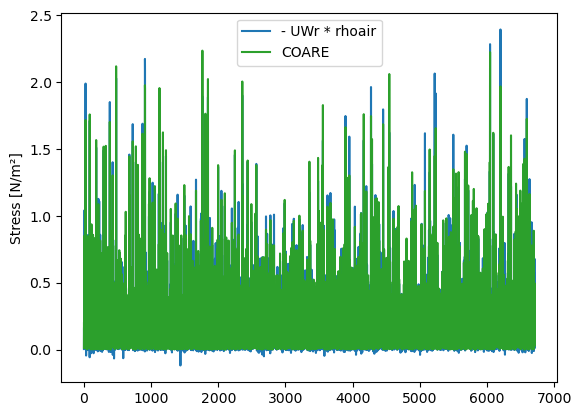

In [56]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

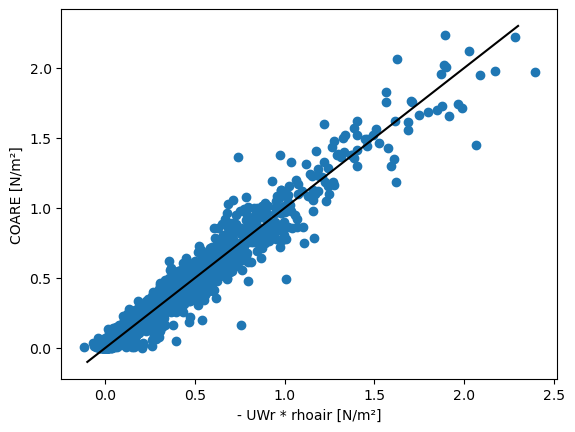

In [57]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [58]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [59]:
df.shape

(6713, 121)

In [60]:
df.shape[0]*0.8

5370.400000000001

In [61]:
split_idx = int(df.shape[0]*0.8)

### Prepare features and labels

In [62]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10',
    'sigma0_trip_fore_grad_x3x3', 'sigma0_trip_mid_grad_x3x3', 'sigma0_trip_aft_grad_x3x3',
    'sigma0_trip_fore_grad_y3x3', 'sigma0_trip_mid_grad_y3x3', 'sigma0_trip_aft_grad_y3x3',
    'sigma0_trip_fore_grad_x7x7', 'sigma0_trip_mid_grad_x7x7', 'sigma0_trip_aft_grad_x7x7',
    'sigma0_trip_fore_grad_y7x7', 'sigma0_trip_mid_grad_y7x7', 'sigma0_trip_aft_grad_y7x7',
    'sigma0_trip_fore_mean3x3', 'sigma0_trip_mid_mean3x3', 'sigma0_trip_aft_mean3x3',
    'sigma0_trip_fore_mean7x7', 'sigma0_trip_mid_mean7x7', 'sigma0_trip_aft_mean7x7'
]

In [63]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,...,sigma0_trip_aft_grad_x7x7,sigma0_trip_fore_grad_y7x7,sigma0_trip_mid_grad_y7x7,sigma0_trip_aft_grad_y7x7,sigma0_trip_fore_mean3x3,sigma0_trip_mid_mean3x3,sigma0_trip_aft_mean3x3,sigma0_trip_fore_mean7x7,sigma0_trip_mid_mean7x7,sigma0_trip_aft_mean7x7
0,-23.692396,-19.716181,-23.761959,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,-5.958139,...,3.084324,-2.821222,-0.960644,-1.710934,-23.468800,-19.921255,-23.608553,-23.518875,-19.902517,-23.376953
1,-21.523678,-17.208441,-15.873583,71.339996,115.869995,160.309998,52.719997,41.770000,52.549999,8.971909,...,-0.902723,1.125799,3.051105,1.752131,-21.635166,-17.551456,-16.258373,-21.562891,-17.821983,-16.549332
2,-15.948977,-8.738081,-16.258532,67.699997,112.379997,156.949997,37.180000,27.869999,37.009998,3.032828,...,0.598228,1.453727,0.837183,0.599088,-15.916733,-8.957937,-16.119785,-16.173889,-9.319918,-15.959322
4,-18.624861,-16.817167,-21.128984,-25.539999,-70.320000,-115.079994,46.989998,36.419998,47.000000,1.774315,...,6.407451,-9.000047,-6.993793,-5.685732,-14.257282,-12.699898,-15.541332,-12.959089,-11.200004,-14.232991
5,-21.866816,-23.372932,-22.020554,100.769997,56.149998,11.610000,61.559998,50.450001,61.439999,8.546311,...,1.005390,0.410275,-2.778847,-2.706682,-22.299492,-23.326365,-22.469748,-23.494291,-23.522486,-23.294008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,-18.994911,-14.778746,-20.393463,-34.809998,-80.799995,-126.799995,53.820000,42.360001,53.639999,13.453721,...,-4.546013,-0.672461,0.432261,1.402555,-19.016619,-14.663075,-20.454111,-19.197395,-14.887797,-20.393259
6789,-21.509340,-18.463285,-16.534340,49.649998,96.159996,142.500000,62.919998,51.419998,62.949997,-4.810270,...,1.024220,1.269001,-0.478813,-0.327351,-21.364321,-18.377037,-16.504398,-21.305622,-18.492966,-16.619625
6790,-22.868994,-17.679859,-20.473143,106.619995,61.910000,17.100000,45.549999,35.090000,45.509998,-8.257064,...,10.628944,-8.863070,-8.802871,-10.382540,-21.969227,-16.789581,-19.362862,-22.282558,-17.058355,-20.217432
6791,-18.350641,-18.557043,-23.477961,-24.510000,-69.269997,-114.119995,60.549999,49.480000,60.639999,1.450890,...,-0.648809,-1.741302,-1.811386,-3.346643,-18.168457,-18.205040,-23.426067,-17.774757,-17.731636,-22.640322


In [64]:
y = - df['UWr'] * df['rhoair']
y

0       0.004143
1       0.163965
2       0.057230
4       0.073337
5       0.077819
          ...   
6788    0.162904
6789    0.239322
6790    0.028252
6791    0.109268
6792    0.570802
Length: 6713, dtype: float64

In [65]:
for c in x.columns:
    if x[c].isna().sum()>0:
        print(c)

In [66]:
y.isna().sum()

0

In [67]:
c = df['stress']

In [68]:
df.shape[0]*0.8

5370.400000000001

In [69]:
split_idx = int(df.shape[0]*0.8)

In [70]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [71]:
c = df['stress']

In [72]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [73]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [74]:
c_train = c[:split_idx]
c_test = c[split_idx:]

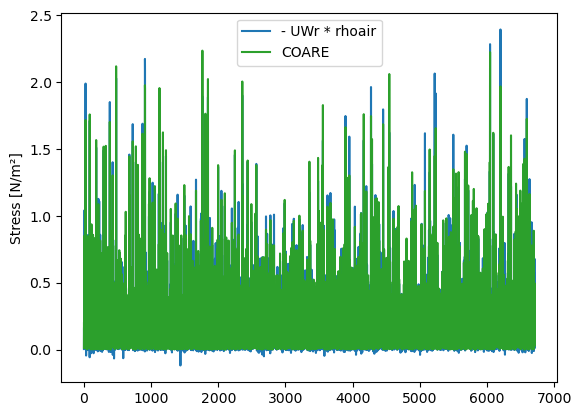

In [75]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [76]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

In [77]:
x_train_std

array([  5.28065249,   5.12017444,   5.30538934,  79.31353344,
        80.50165896, 103.70252282,   7.54663042,   7.02889166,
         7.5535907 ,   5.37784915,   5.40802391,  50.25476564,
         4.68096045,  41.48851657,  28.93648429,   2.47950316,
         2.71911769,  41.16660754,   5.41973702,  29.45571249,
        50.33701484,  50.35218975,  58.2019421 ,  11.76242252,
         4.74704907,   8.88285832,   9.39722222,   5.40053719,
         9.12832822])

In [78]:
y.shape

(6713,)

In [79]:
df.shape

(6713, 121)

In [80]:
split_idx

5370

In [81]:
stress_ifs  = df['stress_ifs']#.loc[split_idx:, :]
stress_ifs.shape
#df_test.shape

(6713,)

In [82]:
stress_ifs_test = stress_ifs[split_idx:]
stress_ifs_test.shape

(1343,)

In [83]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [84]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [85]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-10-04 10:31:18.450707: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-10-04 10:31:18.452119: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-10-04 10:31:19.053417: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Tesla P100-PCIE-12GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 511.41GiB/s
2023-10-04 10:31:19.053455: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-10-04 10:31:19.055883: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-10-04 10:31:19.055957: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10

Epoch 1/500
1/8 [==>...........................] - ETA: 5s - loss: 3.4339 - mean_absolute_error: 1.4262

2023-10-04 10:31:20.402854: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


8/8 [==============================] - 1s 77ms/step - loss: 14.2466 - mean_absolute_error: 2.4456 - val_loss: 0.8691 - val_mean_absolute_error: 0.5948
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 2.5214 - mean_absolute_error: 1.2130 - val_loss: 0.8968 - val_mean_absolute_error: 0.6655
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 1.5511 - mean_absolute_error: 0.8407 - val_loss: 0.7824 - val_mean_absolute_error: 0.5913
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 1.2445 - mean_absolute_error: 0.6989 - val_loss: 0.8307 - val_mean_absolute_error: 0.5832
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 1.2836 - mean_absolute_error: 0.6847 - val_loss: 0.8922 - val_mean_absolute_error: 0.5702
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 1.0197 - mean_absolute_error: 0.6307 - val_loss: 0.7601 - val_mean_absolute_error: 0.5798
Epoch 7/500
8/8 [===========================

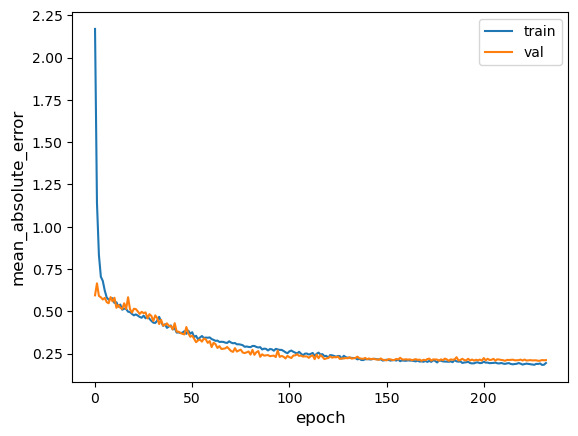

42/42 [==============================] - 0s 959us/step - loss: 0.1839 - mean_absolute_error: 0.2310
Test accuracy 0.23103131353855133
Test loss 0.18394050002098083


In [86]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [87]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [88]:
rmse(y_test.values, y_test_pred)

0.3289073415298255

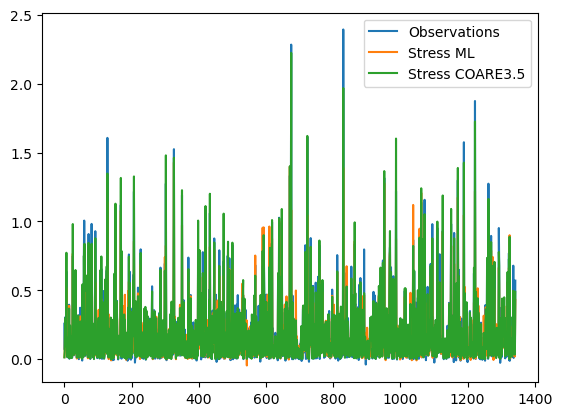

In [89]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

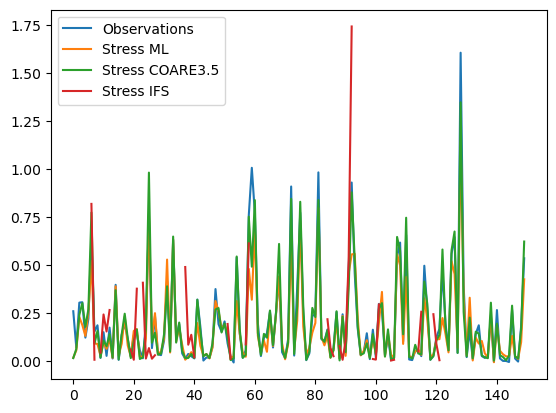

In [90]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.plot(stress_ifs_test.values[:150], label='Stress IFS')
plt.legend()

## Correlation

In [91]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.93028579],
       [0.93028579, 1.        ]])

In [92]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [93]:
pd.DataFrame(y_test.values, stress_ifs_test.values).corr()

,0
0,1.0


In [94]:
y_test.values.shape

(1343,)

In [95]:
y_test_pred[:, 0].shape

(1343,)

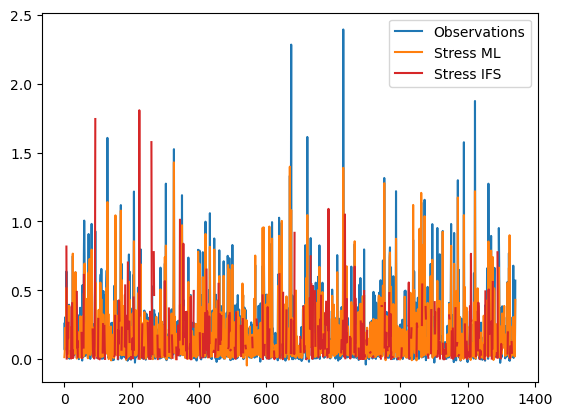

In [96]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred[:, 0], label='Stress ML', color='C1')
plt.plot(stress_ifs_test.values, label='Stress IFS', color='C3')
plt.legend()

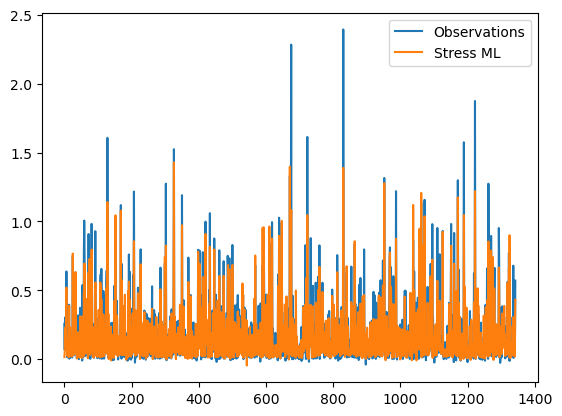

In [97]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [98]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

#### RMSE

COARE

In [99]:
rmse(y_test.values, c_test.values)

0.05068893612983414

##### ML

In [100]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2][:, 0])

0.10011469184639588

In [101]:
rmse(y_test.values, y_test_pred[:, 0])

0.10011469184639588

##### IFS

In [102]:
rmse(y_test.values, stress_ifs_test.values)

0.2847884379012663

#### Bias

##### COARE

In [103]:
np.nansum(y_test.values - c_test.values)/len(y_test.values)

-0.0022570570131028767

##### ML

In [104]:
np.nansum(y_test.values - y_test_pred[:, 0])/len(y_test.values)

0.020915470863928056

##### IFS

In [105]:
np.nansum(y_test.values - stress_ifs_test.values)/np.count_nonzero(~np.isnan(stress_ifs_test.values))

0.0041377646744880925

In [106]:
np.count_nonzero(~np.isnan(stress_ifs_test.values))

588

In [107]:
len(y_test.values)

1343

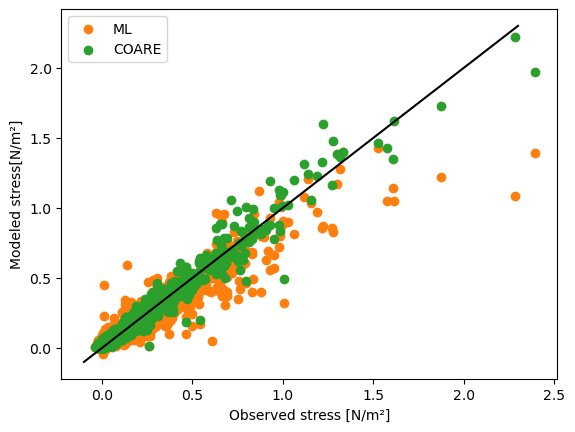

In [108]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [109]:
y_test.values.shape

(1343,)

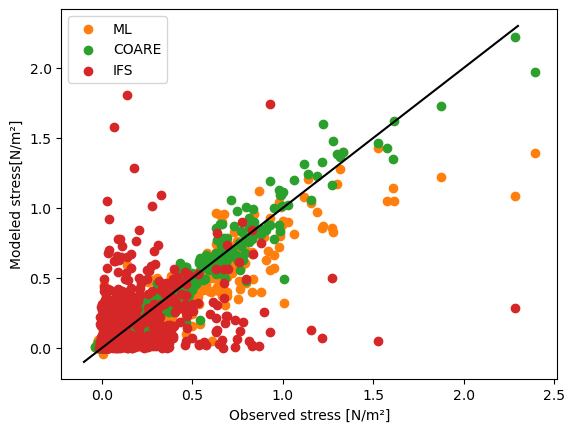

In [110]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2')
plt.scatter(y_test.values, stress_ifs_test.values, label='IFS', color='C3')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

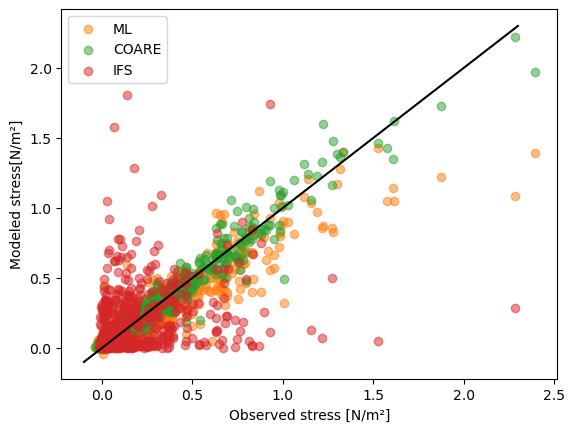

In [111]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1', alpha=0.5)
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2', alpha=0.5)
plt.scatter(y_test.values, stress_ifs_test, label='IFS', color='C3', alpha=0.5)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

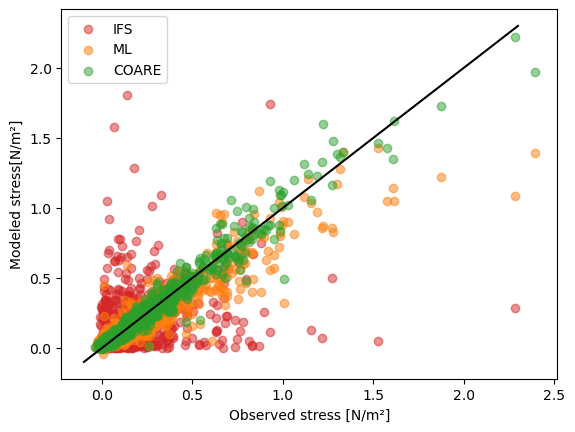

In [112]:
plt.scatter(y_test.values, stress_ifs_test, label='IFS', color='C3', alpha=0.5)
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1', alpha=0.5)
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2', alpha=0.5)

plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

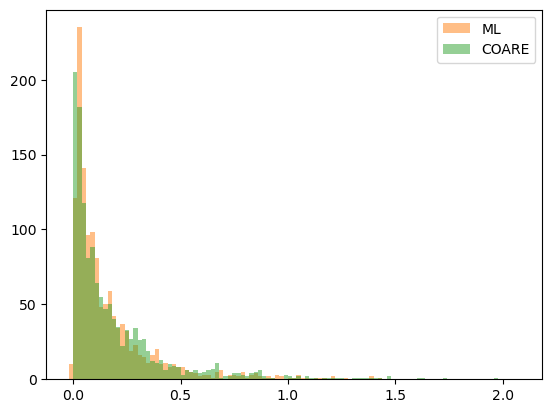

In [113]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

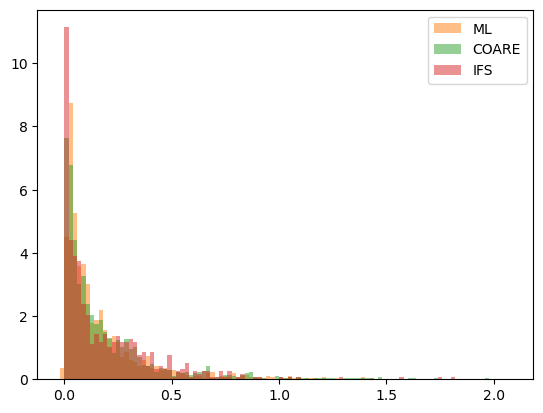

In [114]:
plt.hist(y_test_pred, label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02), density=True)
plt.hist(c_test.values, label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02), density=True)
plt.hist(stress_ifs_test.values, label='IFS', color='C3', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02), density=True)
plt.legend()

##### Residuals

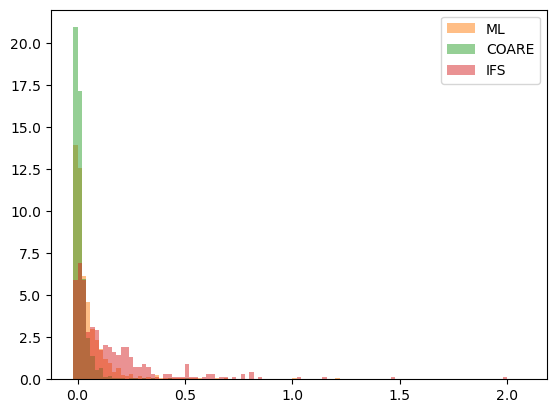

In [115]:
plt.hist(y_test.values - y_test_pred[:, 0], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02), density=True)
plt.hist(y_test.values - c_test.values, label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02), density=True)
plt.hist(y_test.values - stress_ifs_test.values, label='IFS', color='C3', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02), density=True)
plt.legend()

In [116]:
np.save('y_test_pred.npy', y_test_pred)
np.save('c_test.npy', c_test.values)
np.save('stress_ifs_test.npy', stress_ifs_test.values)

In [117]:
df_test = pd.DataFrame(
    data=np.array([y_test.values, y_test_pred[:, 0], c_test.values, stress_ifs_test.values]).T, 
    index=np.arange(len(y_test.values)),
    columns=['Observed', 'ML', 'COARE', 'IFS']
)
df_test

,Observed,ML,COARE,IFS
0,0.258102,0.015537,0.013605,NaN
1,0.069062,0.053598,0.061173,NaN
2,0.302931,0.227751,0.239129,0.230243
3,0.305103,0.185580,0.300724,NaN
4,0.120532,0.129351,0.176800,0.010282
...,...,...,...,...
1338,0.162904,0.104867,0.130312,0.669708
1339,0.239322,0.202129,0.349915,NaN
1340,0.028252,0.019574,0.033636,NaN
1341,0.109268,0.164602,0.120623,NaN


In [118]:
import seaborn as sns

<AxesSubplot:>

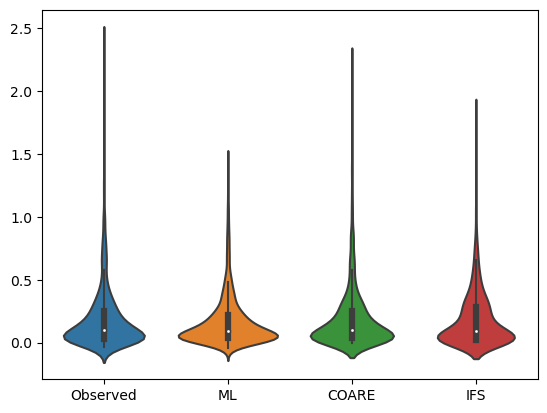

In [119]:
sns.violinplot(df_test)

In [120]:
df_test_residuals = pd.DataFrame(
    data=np.array([y_test.values - y_test_pred[:, 0], y_test.values - c_test.values, y_test.values - stress_ifs_test.values]).T, 
    index=np.arange(len(y_test.values)),
    columns=['ML', 'COARE', 'IFS']
)
df_test_residuals

,ML,COARE,IFS
0,0.242565,0.244497,NaN
1,0.015464,0.007889,NaN
2,0.075180,0.063802,0.072688
3,0.119523,0.004379,NaN
4,-0.008819,-0.056268,0.110250
...,...,...,...
1338,0.058036,0.032592,-0.506804
1339,0.037192,-0.110593,NaN
1340,0.008677,-0.005384,NaN
1341,-0.055334,-0.011355,NaN


<AxesSubplot:>

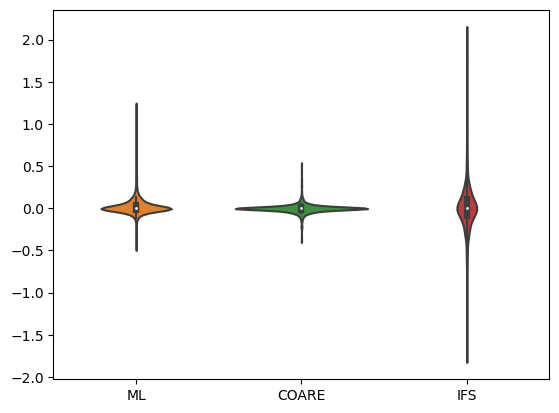

In [121]:
sns.violinplot(df_test_residuals, palette=['C1','C2','C3'])

### Check if the IFS data is correct

For that, we look at the largest stress value, and analyze the raw data directly from the IFS files

In [122]:
y_test[y_test > 2]

6117    2.283491
6275    2.393483
dtype: float64

In [123]:
df.loc[df['stress'] > 2.2]

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_fore_grad_y3x3,sigma0_trip_mid_grad_y3x3,sigma0_trip_aft_grad_y3x3,chnk,msl,t2m,d2m,zust,rho_air,stress_ifs
1785,-0.012150,-0.032903,281.986662,2489.677484,980.057049,981.278003,3.217186,3.29545,78.760671,77.866249,...,0.440717,1.114737,0.160527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,0.009946,-0.040725,262.050002,2491.310387,972.704427,973.937506,1.686507,1.87225,61.779300,59.117944,...,0.943302,2.039915,1.995129,0.015767,103021.578125,282.633392,279.663361,0.476424,1.270453,0.288367


In [124]:
df.loc[6117]['stress']

2.2236741132528235

In [125]:
df.loc[6117]['stress_ifs']

0.2883668607688336

In [126]:
df.loc[6117]['lat']

59.9337

In [127]:
df.loc[6117]['lon']

-39.47378

This is Irminger 3

2016-12-27 13:12:00.001986

In [128]:
ifs_dir = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/ifs/other_params'

In [129]:
import xarray as xr
ifs_data = xr.open_dataset(ifs_dir + '/ifs_fc_20161227.nc')

In [130]:
ifs_data_buoy = ifs_data.sel(
    {
        'time' : '2016-12-27 13:12', 
        'latitude' : df.loc[6117]['lat'], 
        'longitude': df.loc[6117]['lon']
    },
    method='nearest'
)

ifs_data_buoy

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 0.0
    latitude   float32 59.9
    time       datetime64[ns] 2016-12-27T13:00:00
Data variables:
    chnk       float32 ...
    msl        float32 ...
    t2m        float32 ...
    d2m        float32 ...
    zust       float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-08 01:11:00 GMT by grib_to_netcdf-2.26.0: grib_to_n...

In [131]:
import sys
sys.path.append("../../../../../..")
from air_density import air_density

In [132]:
rho_air = air_density(
    Tair=ifs_data_buoy['t2m'],
    Tdew=ifs_data_buoy['d2m'],
    MSLP=ifs_data_buoy['msl']/100
)[0]
# Compute the stress from IFS parameters
stress_ifs_buoy = (ifs_data_buoy['zust']**2) * rho_air

In [133]:
stress_ifs_buoy

<xarray.DataArray ()>
array(0.28836686)
Coordinates:
    longitude  float32 0.0
    latitude   float32 59.9
    time       datetime64[ns] 2016-12-27T13:00:00

### Wind speed

In [134]:
wind_speed_ifs = np.sqrt( (df['u10'].values)**2 + (df['v10'].values)**2)

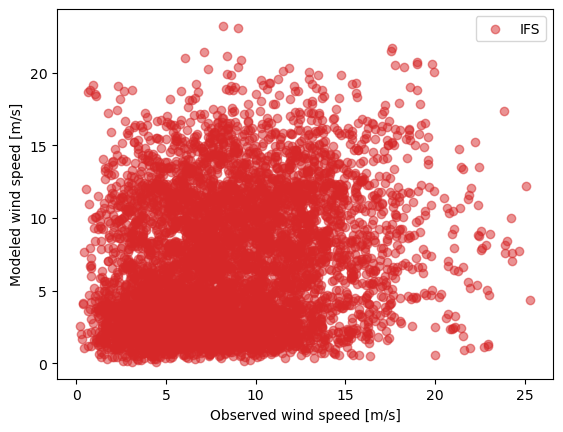

In [135]:
plt.scatter(df['U10e'].values, wind_speed_ifs, label='IFS', color='C3', alpha=0.5)
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.legend()

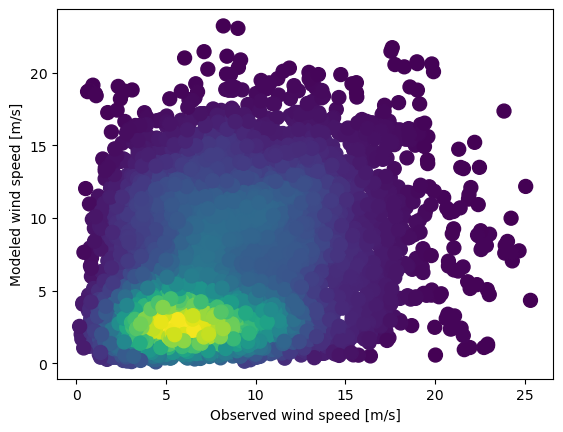

In [136]:
from scipy.stats import gaussian_kde

# Generate fake data
x = df['U10e'].values
y = wind_speed_ifs

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.show()

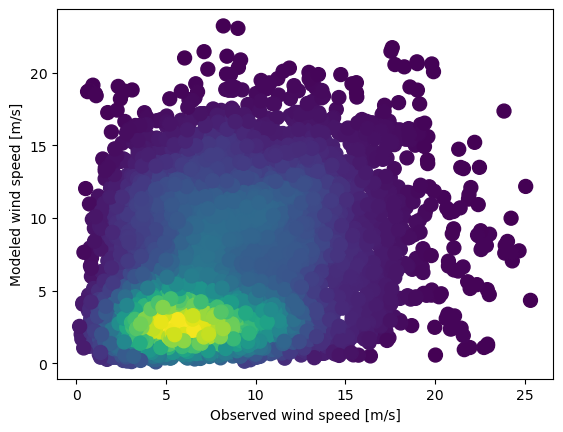

In [137]:
from scipy.stats import gaussian_kde

# Generate fake data
x = df['U10e'].values
y = wind_speed_ifs

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlabel('Observed wind speed [m/s]') 
plt.ylabel('Modeled wind speed [m/s]') 
plt.show()

In [138]:
df.loc[df['U10e'] > 25][['U10e', 'lat', 'lon', 'u10', 'v10']]

,U10e,lat,lon,u10,v10
1785,25.329000,59.9337,-39.47378,3.512054,2.520271
6117,25.062265,59.9337,-39.47378,12.065977,-1.523370


# Best model

In [175]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [176]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [177]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 1s 53ms/step - loss: 22.0930 - mean_absolute_error: 3.0493 - val_loss: 0.8797 - val_mean_absolute_error: 0.5510
Epoch 2/500
8/8 [==============================] - 0s 36ms/step - loss: 3.3912 - mean_absolute_error: 1.3711 - val_loss: 1.2635 - val_mean_absolute_error: 0.7080
Epoch 3/500
8/8 [==============================] - 0s 36ms/step - loss: 1.7147 - mean_absolute_error: 0.8345 - val_loss: 0.7800 - val_mean_absolute_error: 0.5159
Epoch 4/500
8/8 [==============================] - 0s 34ms/step - loss: 1.2097 - mean_absolute_error: 0.7554 - val_loss: 0.8297 - val_mean_absolute_error: 0.5282
Epoch 5/500
8/8 [==============================] - 0s 35ms/step - loss: 1.0629 - mean_absolute_error: 0.6731 - val_loss: 0.7500 - val_mean_absolute_error: 0.4912
Epoch 6/500
8/8 [==============================] - 0s 35ms/step - loss: 0.8572 - mean_absolute_error: 0.6387 - val_loss: 0.8469 - val_mean_absolute_error: 0.5113
Epoch 7/500
8/8 [==========

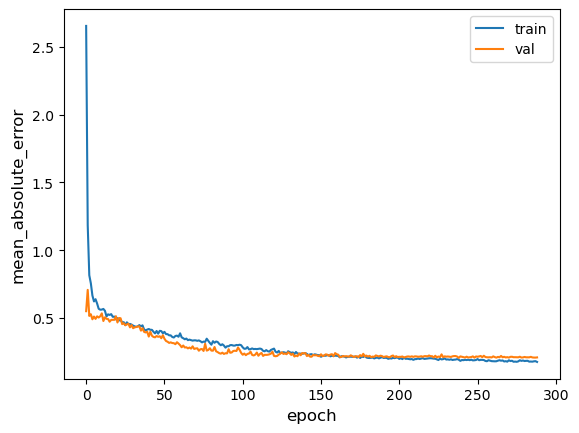

42/42 [==============================] - 0s 3ms/step - loss: 0.1788 - mean_absolute_error: 0.2285
Test accuracy 0.22851349413394928
Test loss 0.1788140833377838


In [178]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [179]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [180]:
rmse(y_test.values, y_test_pred)

0.3324370655627457

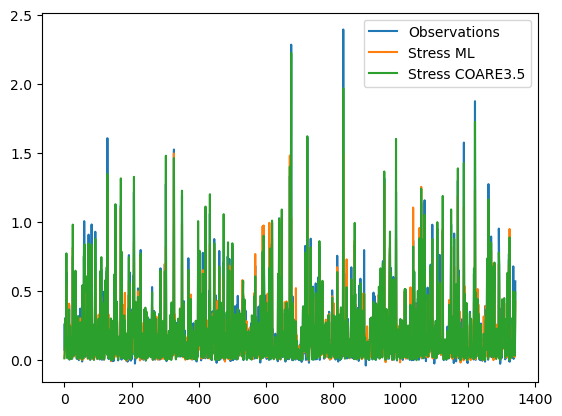

In [181]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

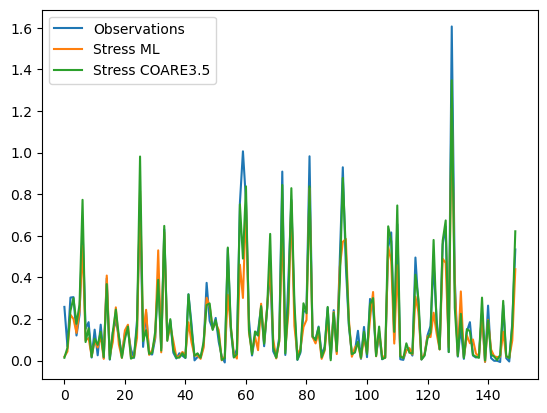

In [182]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [183]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.92910702],
       [0.92910702, 1.        ]])

In [184]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

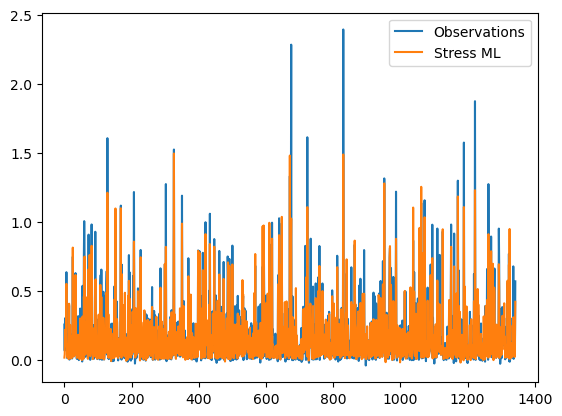

In [185]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [186]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [187]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3324370655627457

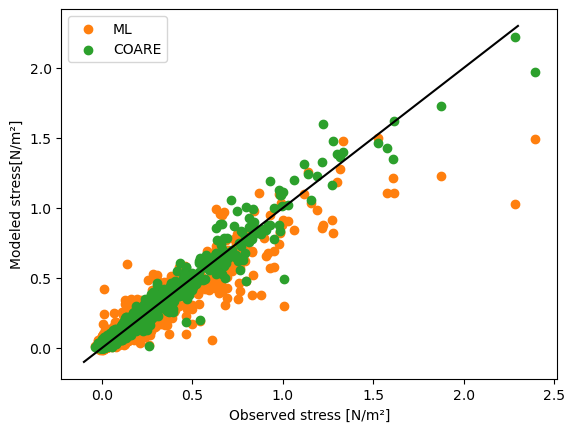

In [188]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

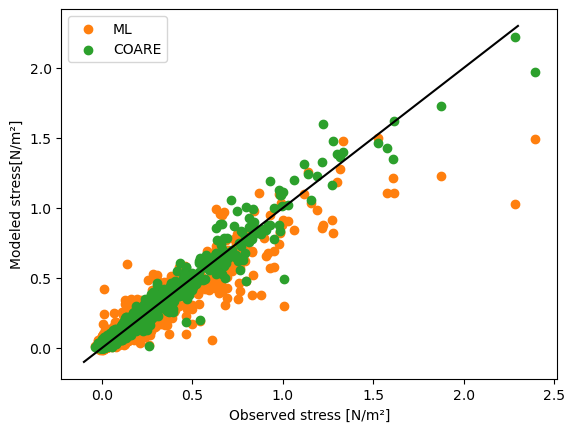

In [189]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()